In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
print(iris['target'])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
##independent features

X = pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [10]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
##dependent features
y=iris['target']

In [12]:
##train test plot
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

#### in decision tree algorithm we did not require any kind of standardization or normalization

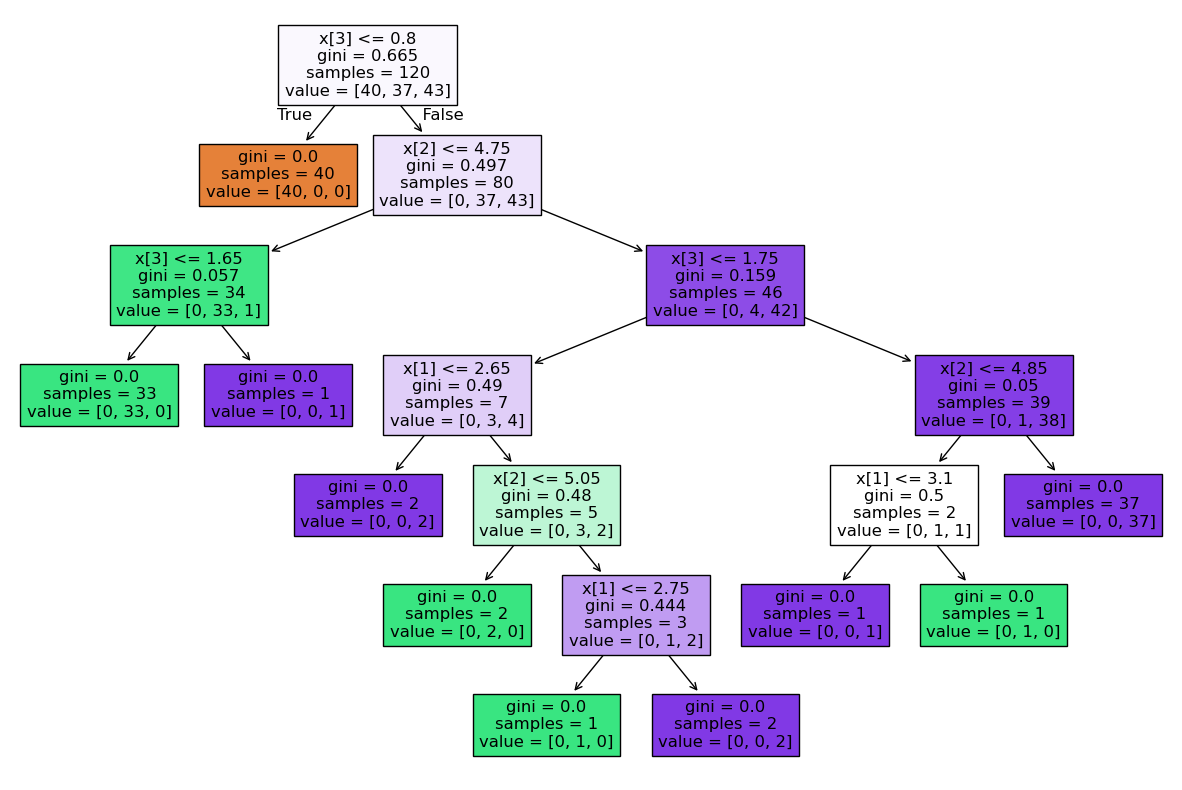

In [17]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import tree

classifier = DecisionTreeClassifier()

classifier.fit(X_train,y_train)

## analyse the the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)
plt.show()


In [18]:
y_pred = classifier.predict(X_test)

## checking the performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


#### post preuning
after constructiong the whole decision tree we remove the feature or preune then less important node features. This is done to lower the overfitting

for post preuning we only set the max_depth in decision classifier tree to the point where don not need more divisions

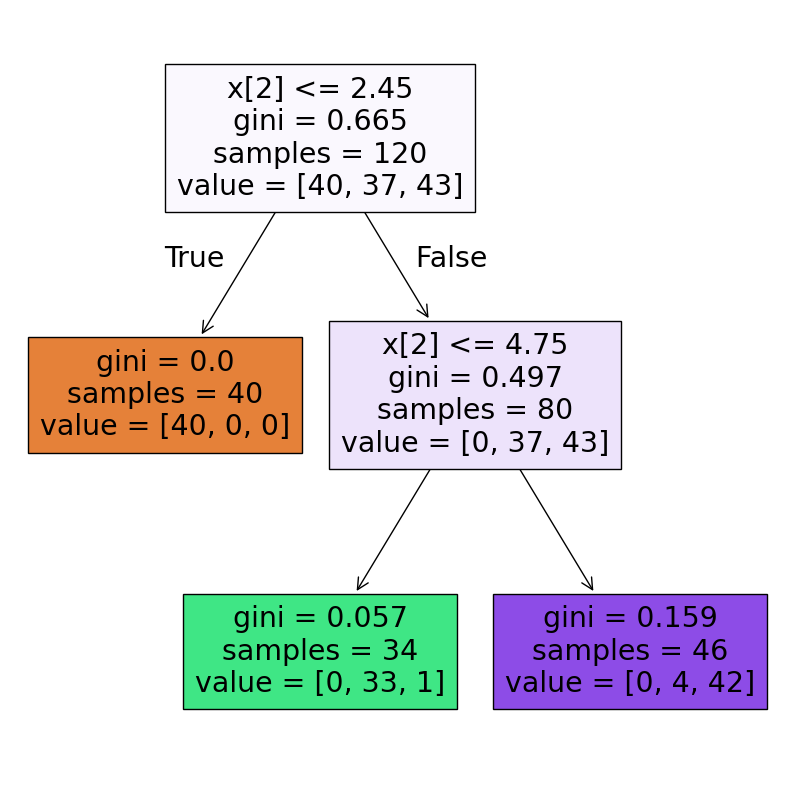

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30

0.9333333333333333


In [25]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)

## analyse the the decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(classifier,filled=True)
plt.show()
y_pred = classifier.predict(X_test)

## checking the performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

## Decision Tree Classifier Prepruning And Hyperparameter Tuning

In [65]:
params={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['sqrt','log2']
}

In [66]:
params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['sqrt', 'log2']}

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
classifier = DecisionTreeClassifier()

In [69]:
grid = GridSearchCV(estimator =classifier,param_grid=params,scoring=accuracy_score,n_jobs=-1,cv=5)

In [70]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring=<function accuracy_score at 0x000001D870700D60>)

In [71]:
grid.best_params_


{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'splitter': 'best'}

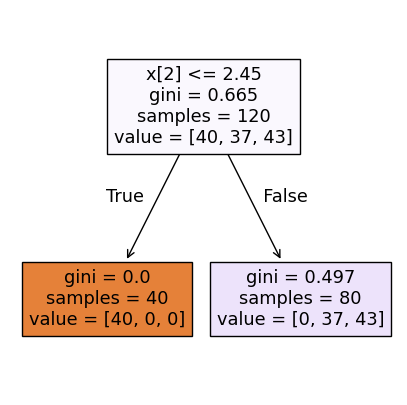

In [72]:
plt.figure(figsize=(5,5))
tree.plot_tree(grid.best_estimator_, filled=True)
plt.show()

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred = grid.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5666666666666667
[[10  0  0]
 [ 0  0 13]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00        13
           2       0.35      1.00      0.52         7

    accuracy                           0.57        30
   macro avg       0.45      0.67      0.51        30
weighted avg       0.41      0.57      0.45        30



In [ ]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()

from sklearn.svm import SVC
s = SVC()